In [6]:
# %load conditionalprobability
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls / older_girl)       # ~ 1/2
print("P(both | either):", both_girls / either_girl)     # ~ 1/3


P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


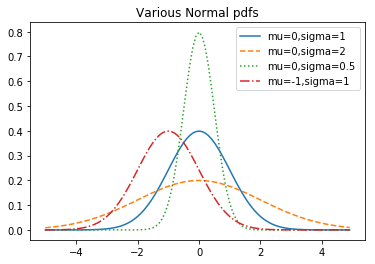

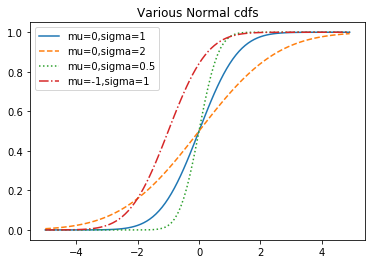

In [8]:
# %load continuousdistributions.py
from matplotlib import pyplot as plt
import math

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variale is <= x"
    if x < 0:   return 0    # uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # uniform random is always less than 1

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x)           for x in xs], '-',  label='mu=0,sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2)   for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':',  label='mu=0,sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1)     for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x)            for x in xs], '-',  label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2)   for x in xs], '--', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':',  label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1)     for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal cdfs")
plt.show()

In [18]:
# %load centrallimittheorem
import random
import math
from matplotlib import pyplot as plt
from collections import Counter

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu. sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

AttributeError: 'float' object has no attribute 'sigma'

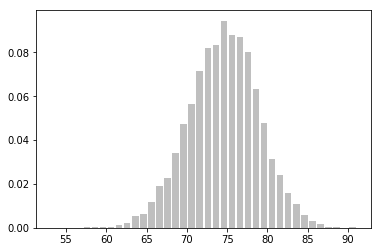

In [19]:
make_hist(0.75, 100, 10000)